# Analisis Estrategico de musica en Spotify
#Strategic analysis of music on Spotify

Spanish : Importamos las librerias más ocupadas para nuestro analisis las cuales seran numpy y pandas

English : We import the most important libraries for our analysis which will be numpy and pandas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/top50.csv',encoding='latin-1')
df.head()
df.columns = map(str.lower, df.columns)

In [ ]:
##Here we describe the dataset and its included Parameters
df.describe()

,unnamed: 0,beats.per.minute,energy,danceability,loudness..db..,liveness,valence.,length.,acousticness..,speechiness.,popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [ ]:
#With the function info we can see the described data and form of the dataframe and dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   unnamed: 0        50 non-null     int64 
 1   track.name        50 non-null     object
 2   artist.name       50 non-null     object
 3   genre             50 non-null     object
 4   beats.per.minute  50 non-null     int64 
 5   energy            50 non-null     int64 
 6   danceability      50 non-null     int64 
 7   loudness..db..    50 non-null     int64 
 8   liveness          50 non-null     int64 
 9   valence.          50 non-null     int64 
 10  length.           50 non-null     int64 
 11  acousticness..    50 non-null     int64 
 12  speechiness.      50 non-null     int64 
 13  popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [ ]:
## we use groupby to group by the artist name and then we check the size of each column
## we print out the values to check the data structure
print(df.groupby('artist.name').size())
popular_artist = df.groupby('artist.name').size()
print(popular_artist)
artist_list = df['artist.name'].values.tolist()


artist.name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSALÍA             1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
dtype: int64
artist.name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown      

In [ ]:
## Printing genre data

print(type(df['Genre']))
popular_genre = df.groupby('genre').size().unique
print(popular_genre)
genre_list = df['Genre'].values.tolist()

<class 'pandas.core.series.Series'>
<bound method Series.unique of Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
dtype: int64>


Text(0, 0.5, 'Count of the tracks')

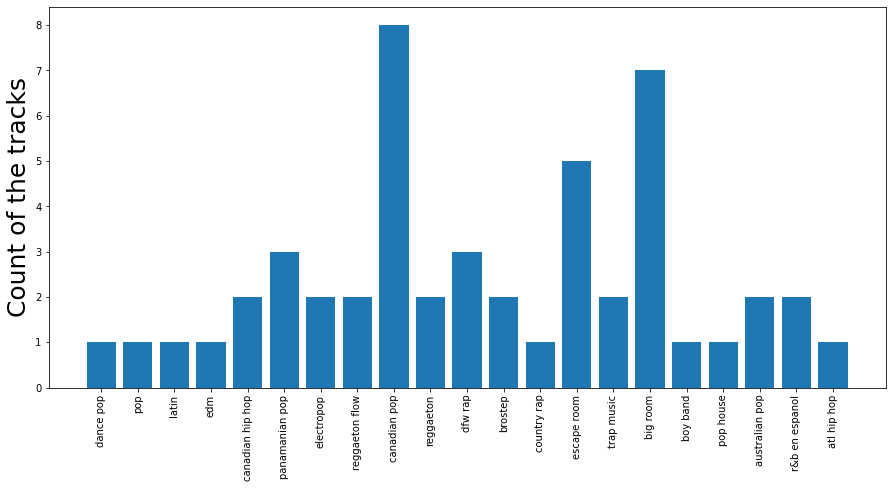

In [ ]:
xtick = ['dance pop', 'pop', 'latin', 'edm', 'canadian hip hop',
'panamanian pop', 'electropop', 'reggaeton flow', 'canadian pop',
'reggaeton', 'dfw rap', 'brostep', 'country rap', 'escape room',
'trap music', 'big room', 'boy band', 'pop house', 'australian pop',
'r&b en espanol', 'atl hip hop']
## We rename the dataset labels then we grounby genre and then we cluster the dataset 
length = np.arange(len(xtick))
genre_groupby = df.groupby('genre')['track_name'].agg(len)

# We use plt to plot the data from the librarie matplotlib
plt.figure(figsize=(15,7))
plt.bar(length, genre_groupby)
plt.xticks(length, xtick)
plt.xticks(rotation=90)
plt.ylabel('genre', fontsize=20)
plt.ylabel('Count of the tracks', fontsize=25)

Text(0.5, 1.0, 'Artist Name vs Count of songs')

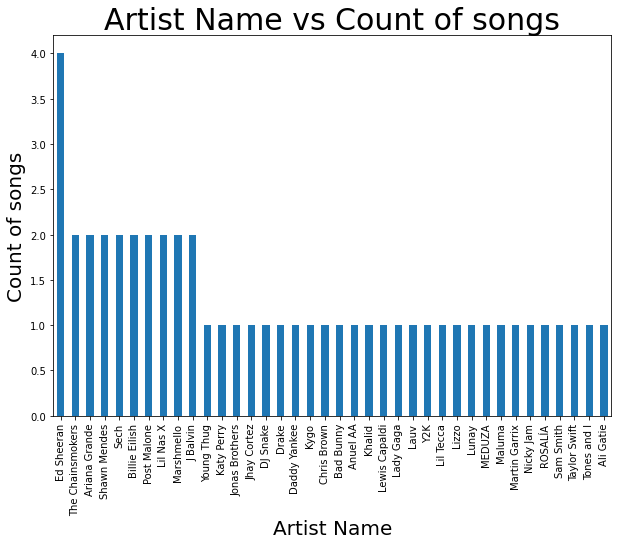

In [ ]:
## Here we can see the song account with the artist name cross difference 

fig = plt.figure(figsize=(10,7))
df.groupby('artist.name')['track.name'].agg(len).sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Artist Name', fontsize=20)
plt.ylabel('Count of songs',fontsize=20)
plt.title('Artist Name vs Count of songs', fontsize=30)